In [1]:
import sys
# sys.path.append("/home1/gyrbsdl/jupyter_notebook/isearch/agent")
# from agents_20171028.py import *
from agents import *

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### where path to read & write

notebook_name = "train_CartPole_CNN"
BASE_DIR = './'
CHECK_POINT_DIR = BASE_DIR+notebook_name
TB_SUMMARY_DIR = CHECK_POINT_DIR+"/tb_summary"

### what env to use ###

import gym
env = gym.make('CartPole-v0')

state_space_size = 0

try:
    state_space_size = env.observation_space.n
except:
    state_space_size = env.observation_space.shape[0]
action_space_size = env.action_space.n
layers = [state_space_size, action_space_size]

init_learning_rate = 1e-6
agent = MultilayerPolicyGradientCNN(learning_rate=init_learning_rate,
                                    discount_factor=0.99,
                                    layers=layers,
                                    dropout_rate=0.2,
                                    reward_standardize=True) #Load the agent.



dropout_rate: 0.2
scope: MultilayerPolicyGradientCNN learning_rate: 1e-06 discount_factor: 0.99 reward_standardize: True
original input size: 4
virtual_image_size: 4 X 4 = 16
simple CNN is constructed


In [2]:
import shutil
try:
    shutil.rmtree(CHECK_POINT_DIR)
    print CHECK_POINT_DIR, "removed"
except:
    print CHECK_POINT_DIR, "does not exists yet"
    

./train_CartPole_CNN removed


In [3]:
def print_now():
    import datetime
    from dateutil.tz import tzlocal

    # Get the current date/time with the timezone.
    now = datetime.datetime.now(tzlocal())
    fmt1 = now.strftime('%Y-%m-%d %A %H:%M:%S %Z')

    # Print it out.
    print 'now: %s' % (fmt1)
    
def try_and_error(env, agent, total_episodes,
                  update_frequency, learning_rate_frequency, debug_frequency,
                  is_train = True
                 ):
    total_reward = []
    min_learning_rate = 1e-10
    decay_learning_rate = 0.9
    previous_loss = 9e+10
    last_save_name = ""

    for i in range(total_episodes):
        s = env.reset()
        reward_sum = 0
        
        done = False
        while not done:
            # Run the policy network and get an action to take.
            if is_train == True:
                action = agent.get_action(sess, s)
            else:
                action = agent.exploit(sess, s)
            
            # step the environment and get new measurements
            observation, reward, done, _ = env.step(action)
            reward_sum += reward
            agent.after_action(sess, reward)
            
            s = observation
        
        if is_train == True:
            loss , grads , _ = agent.after_episode(sess)
            # If we have completed enough episodes, then update the policy network with our gradients.
            if i % update_frequency == 0 and i != 0:
                agent.after_batch(sess)

            # decaying learning rate
            if i % learning_rate_frequency == 0 and i != 0:
                if (loss > previous_loss and agent.learning_rate >= min_learning_rate):
                    agent.learning_rate = agent.learning_rate * decay_learning_rate
                    print "i:", i, "new agent.learning_rate", agent.learning_rate
                previous_loss = loss

        total_reward.append(reward_sum)
        
        #Update our running tally of scores.
        if i % debug_frequency == 0:
            print "-------------------------------------------"
            print_now()
#             print i, grads
            mean = np.mean(total_reward)
            print i, (mean)
            plt_means.append(mean)
            total_reward = []
            if is_train == True and loss <= previous_loss:
                # save only better model
                agent.save_model(sess, CHECK_POINT_DIR)

In [4]:
plt_means=[]
init = tf.global_variables_initializer()

# Launch the tensorflow graph
with tf.Session() as sess:
    sess.run(init)  
    agent.before(sess)
    
    try_and_error(env, agent,
                  total_episodes=1000000,
                  update_frequency=10,
                  debug_frequency=5000,
                  learning_rate_frequency=500,
                  is_train=True
                 )
    

-------------------------------------------
now: 2017-11-01 Wednesday 18:21:41 KST
0 12.0
Model saved at ./train_CartPole_CNN
i: 1000 new agent.learning_rate 9e-07
i: 2000 new agent.learning_rate 8.1e-07
i: 3000 new agent.learning_rate 7.29e-07
i: 3500 new agent.learning_rate 6.561e-07
i: 4000 new agent.learning_rate 5.9049e-07
i: 5000 new agent.learning_rate 5.31441e-07
-------------------------------------------
now: 2017-11-01 Wednesday 18:23:01 KST
5000 22.5092
Model saved at ./train_CartPole_CNN
i: 6000 new agent.learning_rate 4.782969e-07
i: 7000 new agent.learning_rate 4.3046721e-07
i: 7500 new agent.learning_rate 3.87420489e-07
i: 8000 new agent.learning_rate 3.486784401e-07
i: 9000 new agent.learning_rate 3.1381059609e-07
i: 9500 new agent.learning_rate 2.82429536481e-07
-------------------------------------------
now: 2017-11-01 Wednesday 18:24:19 KST
10000 22.9308
Model saved at ./train_CartPole_CNN
i: 10500 new agent.learning_rate 2.54186582833e-07
i: 11500 new agent.learni

-------------------------------------------
now: 2017-11-01 Wednesday 19:03:46 KST
145000 28.9584
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-01 Wednesday 19:05:23 KST
150000 29.557
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-01 Wednesday 19:07:02 KST
155000 30.074
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-01 Wednesday 19:08:42 KST
160000 30.7422
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-01 Wednesday 19:10:23 KST
165000 30.8726
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-01 Wednesday 19:12:06 KST
170000 31.3618
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-01 Wednesday 19:13:48 KST
175000 31.55
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-01 Wednes

-------------------------------------------
now: 2017-11-01 Wednesday 21:50:34 KST
455000 69.538
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-01 Wednesday 21:54:06 KST
460000 69.7016
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-01 Wednesday 21:57:44 KST
465000 71.5784
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-01 Wednesday 22:01:28 KST
470000 73.8156
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-01 Wednesday 22:05:14 KST
475000 74.5386
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-01 Wednesday 22:09:07 KST
480000 76.9432
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-01 Wednesday 22:13:01 KST
485000 77.3864
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-01 Wed

-------------------------------------------
now: 2017-11-02 Thursday 04:26:23 KST
765000 175.3464
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-02 Thursday 04:35:11 KST
770000 176.5184
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-02 Thursday 04:44:08 KST
775000 178.478
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-02 Thursday 04:53:00 KST
780000 178.8044
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-02 Thursday 05:01:50 KST
785000 178.5378
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-02 Thursday 05:10:46 KST
790000 179.9346
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-02 Thursday 05:19:43 KST
795000 180.9674
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-02 Thu

Means of each bundle of episodes


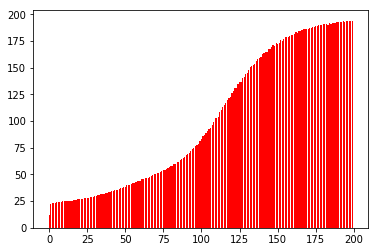

now: 2017-11-02 Thursday 11:44:42 KST


In [5]:
print("Means of each bundle of episodes")
plt.bar(range(len(plt_means)), plt_means, color="red")
plt.show()
print_now()

In [6]:
########## 기존 모델을 로딩하여 추가로 학습 후 저장하기 ##########

# Launch the tensorflow graph
with tf.Session() as sess:
    
    agent.load_model(sess, CHECK_POINT_DIR)
    
    try_and_error(env, agent,
                  total_episodes=1000,
                  update_frequency=3,
                  debug_frequency=100,
                  learning_rate_frequency=50,
                  is_train=True
                 )
    

print_now()

INFO:tensorflow:Restoring parameters from ./train_CartPole_CNN/model.ckpt-201711021134
Model restored successfully from ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-02 Thursday 11:44:42 KST
0 200.0
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-02 Thursday 11:44:54 KST
100 194.29
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-02 Thursday 11:45:06 KST
200 193.69
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-02 Thursday 11:45:18 KST
300 194.76
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-02 Thursday 11:45:30 KST
400 195.3
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-02 Thursday 11:45:42 KST
500 191.79
Model saved at ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-02 Thursday 11:45:54 KST
600 193

In [7]:
########## 기존 모델을 이용하기만 해보기 ##########


# Launch the tensorflow graph
with tf.Session() as sess:
    agent.load_model(sess, CHECK_POINT_DIR)
    agent.before(sess)
    
    try_and_error(env, agent,
                  total_episodes=1000,
                  update_frequency=3,
                  debug_frequency=100,
                  learning_rate_frequency=50,
                  is_train=False
                 )

INFO:tensorflow:Restoring parameters from ./train_CartPole_CNN/model.ckpt-201711021146
Model restored successfully from ./train_CartPole_CNN
-------------------------------------------
now: 2017-11-02 Thursday 11:46:43 KST
0 200.0
-------------------------------------------
now: 2017-11-02 Thursday 11:46:52 KST
100 200.0
-------------------------------------------
now: 2017-11-02 Thursday 11:47:01 KST
200 200.0
-------------------------------------------
now: 2017-11-02 Thursday 11:47:09 KST
300 200.0
-------------------------------------------
now: 2017-11-02 Thursday 11:47:18 KST
400 200.0
-------------------------------------------
now: 2017-11-02 Thursday 11:47:27 KST
500 200.0
-------------------------------------------
now: 2017-11-02 Thursday 11:47:36 KST
600 200.0
-------------------------------------------
now: 2017-11-02 Thursday 11:47:44 KST
700 200.0
-------------------------------------------
now: 2017-11-02 Thursday 11:47:53 KST
800 200.0
---------------------------------

Means of each bundle of episodes


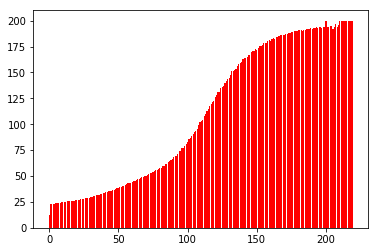

now: 2017-11-02 Thursday 11:48:11 KST


In [8]:
print("Means of each bundle of episodes")
plt.bar(range(len(plt_means)), plt_means, color="red")
plt.show()
print_now()

In [9]:
print CHECK_POINT_DIR 
sorted(agent.read_ckpt(CHECK_POINT_DIR))

./train_CartPole_CNN


['MultilayerPolicyGradientCNN/MultilayerPolicyGradientCNN/W_conv1/Adam',
 'MultilayerPolicyGradientCNN/MultilayerPolicyGradientCNN/W_conv1/Adam_1',
 'MultilayerPolicyGradientCNN/MultilayerPolicyGradientCNN/W_conv2/Adam',
 'MultilayerPolicyGradientCNN/MultilayerPolicyGradientCNN/W_conv2/Adam_1',
 'MultilayerPolicyGradientCNN/MultilayerPolicyGradientCNN/W_fc1/Adam',
 'MultilayerPolicyGradientCNN/MultilayerPolicyGradientCNN/W_fc1/Adam_1',
 'MultilayerPolicyGradientCNN/MultilayerPolicyGradientCNN/W_fc2/Adam',
 'MultilayerPolicyGradientCNN/MultilayerPolicyGradientCNN/W_fc2/Adam_1',
 'MultilayerPolicyGradientCNN/MultilayerPolicyGradientCNN/b_conv1/Adam',
 'MultilayerPolicyGradientCNN/MultilayerPolicyGradientCNN/b_conv1/Adam_1',
 'MultilayerPolicyGradientCNN/MultilayerPolicyGradientCNN/b_conv2/Adam',
 'MultilayerPolicyGradientCNN/MultilayerPolicyGradientCNN/b_conv2/Adam_1',
 'MultilayerPolicyGradientCNN/MultilayerPolicyGradientCNN/b_fc1/Adam',
 'MultilayerPolicyGradientCNN/MultilayerPolicyGra